In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from face_util import map_labels, plot_different_pcs

load, resize, and visualize the dataset.

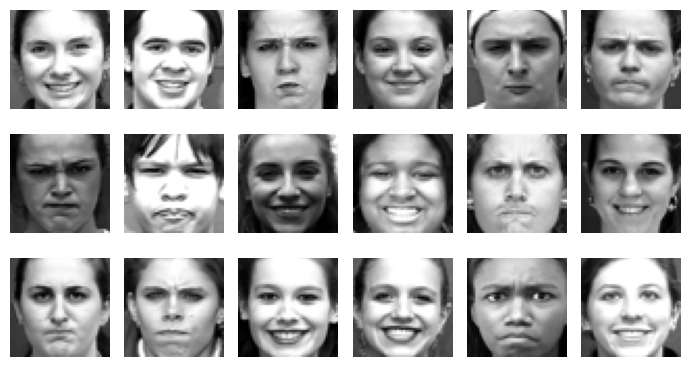

In [2]:
X_train = np.load('dataset/X_train.npy')
y_train = np.load('dataset/y_train.npy')
X_test = np.load('dataset/X_test.npy')
y_test = np.load('dataset/y_test.npy')
imsize = (48, 48)

fig, axes = plt.subplots(3, 6, figsize=(7, 4))
axes = axes.ravel()
for i in range(3*6):
    im = X_train[i].reshape(imsize)
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

#### Pricipal Components Analysis 

1) Compute the mean $\bar{X}$, std $S$, and principal components $U_k$ from the training set $X_{train}$.

In [3]:
N = len(X_train)
k = 100 # number of principal components to keep

X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
B = (X_train - X_mean) / X_std
C = B.T@B / (N-1) # covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1] 
all_principal_components = eigenvectors[:, sorted_indices] # sort the eigenvectors by eigenvalues
principal_components = all_principal_components[:, :k] # keep only first k principal components, obtaining U_k

2) Apply the learned principal components on unseen test data.

In [4]:
# 2) Transform into new basis.
B_test = (X_test - X_mean) / X_std # We are using mean and std of training set.
Z_test = B_test @ principal_components # the transformed data

# 3) Reconstructing X_test back from Z_test.
B_test_recon = Z_test @ principal_components.T
X_test_recon = B_test_recon * X_std + X_mean

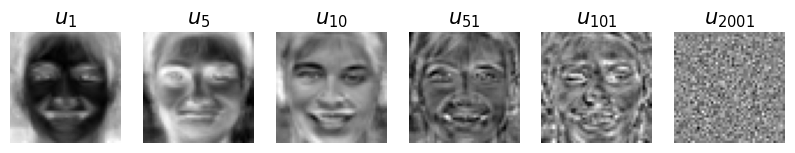

In [14]:
pc_to_be_plotted = [0, 4, 9, 50, 100, 2000]
fig, axes = plt.subplots(1, len(pc_to_be_plotted), figsize=(10, 5))
for i, pc_idx in enumerate(pc_to_be_plotted):
    u = all_principal_components[:,  pc_idx]
    u = np.reshape(u, imsize)
    axes[i].imshow(u, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'$u_{{{pc_idx+1}}}$', fontdict={"fontsize": 15})
plt.show()

Plot the reconstructed images with different number of principal components.

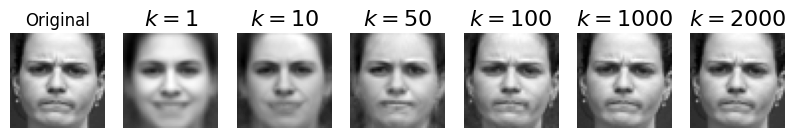

In [9]:
X = X_test[:1]
num_pcs = [1, 10, 50, 100, 1000, 2000]
plot_different_pcs(X, num_pcs, imsize, X_mean, X_std, all_principal_components)

scatter plot of pairs of $Z_{test}$, illustrating how angry and happy facces are segregrated.

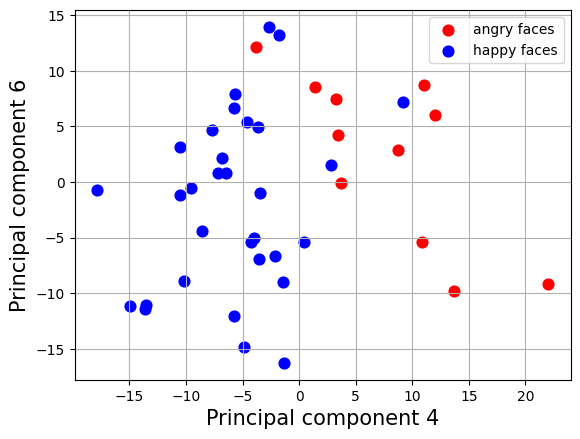

: 

In [16]:
pc_x = 3 # 4nd principal component on x-axis
pc_y = 5 # 6nd principal component on y-axis

c = np.array(map_labels(y_test))
plt.scatter(Z_test[c==0, pc_x], Z_test[c==0, pc_y], s=60, c='red', label='angry faces') # anger
plt.scatter(Z_test[c==4, pc_x], Z_test[c==4, pc_y], s=60, c='blue', label='happy faces') # happy
plt.xlabel(f'Principal component {pc_x+1}', fontdict={'fontsize': 15})
plt.ylabel(f'Principal component {pc_y+1}', fontdict={'fontsize': 15})
plt.legend()
plt.grid()
plt.show()